<a href="https://colab.research.google.com/github/prayushi25/geoloacation-data-ML/blob/main/geolocational_data_analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("food_coded.csv")

data
#data collection

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,3.0,2,1.0,"My diet consists mainly of coffee, water, frui...",2,2.0,I have noticed there is less time for a prepar...,1,3,2,1.0,4,2.0,4.0,Accountant,Italian,1,1.0,Stromboli Mac and Cheese and Pizza,1,5,4,5,5,mainly protein and vegetables with a complex c...,My ideal diet would consist of a majority of w...,6,4.0,3,5,7.0,1.0,"pasta, fish, steak",3.0,Radiological Technician,5,3.0,1,4,3.0

In [ ]:
#DATA CLEANING 


In [ ]:
data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [ ]:
 column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

d = data[column]

d

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


In [ ]:
#DATA EXPLORATION AND VISUALISATION

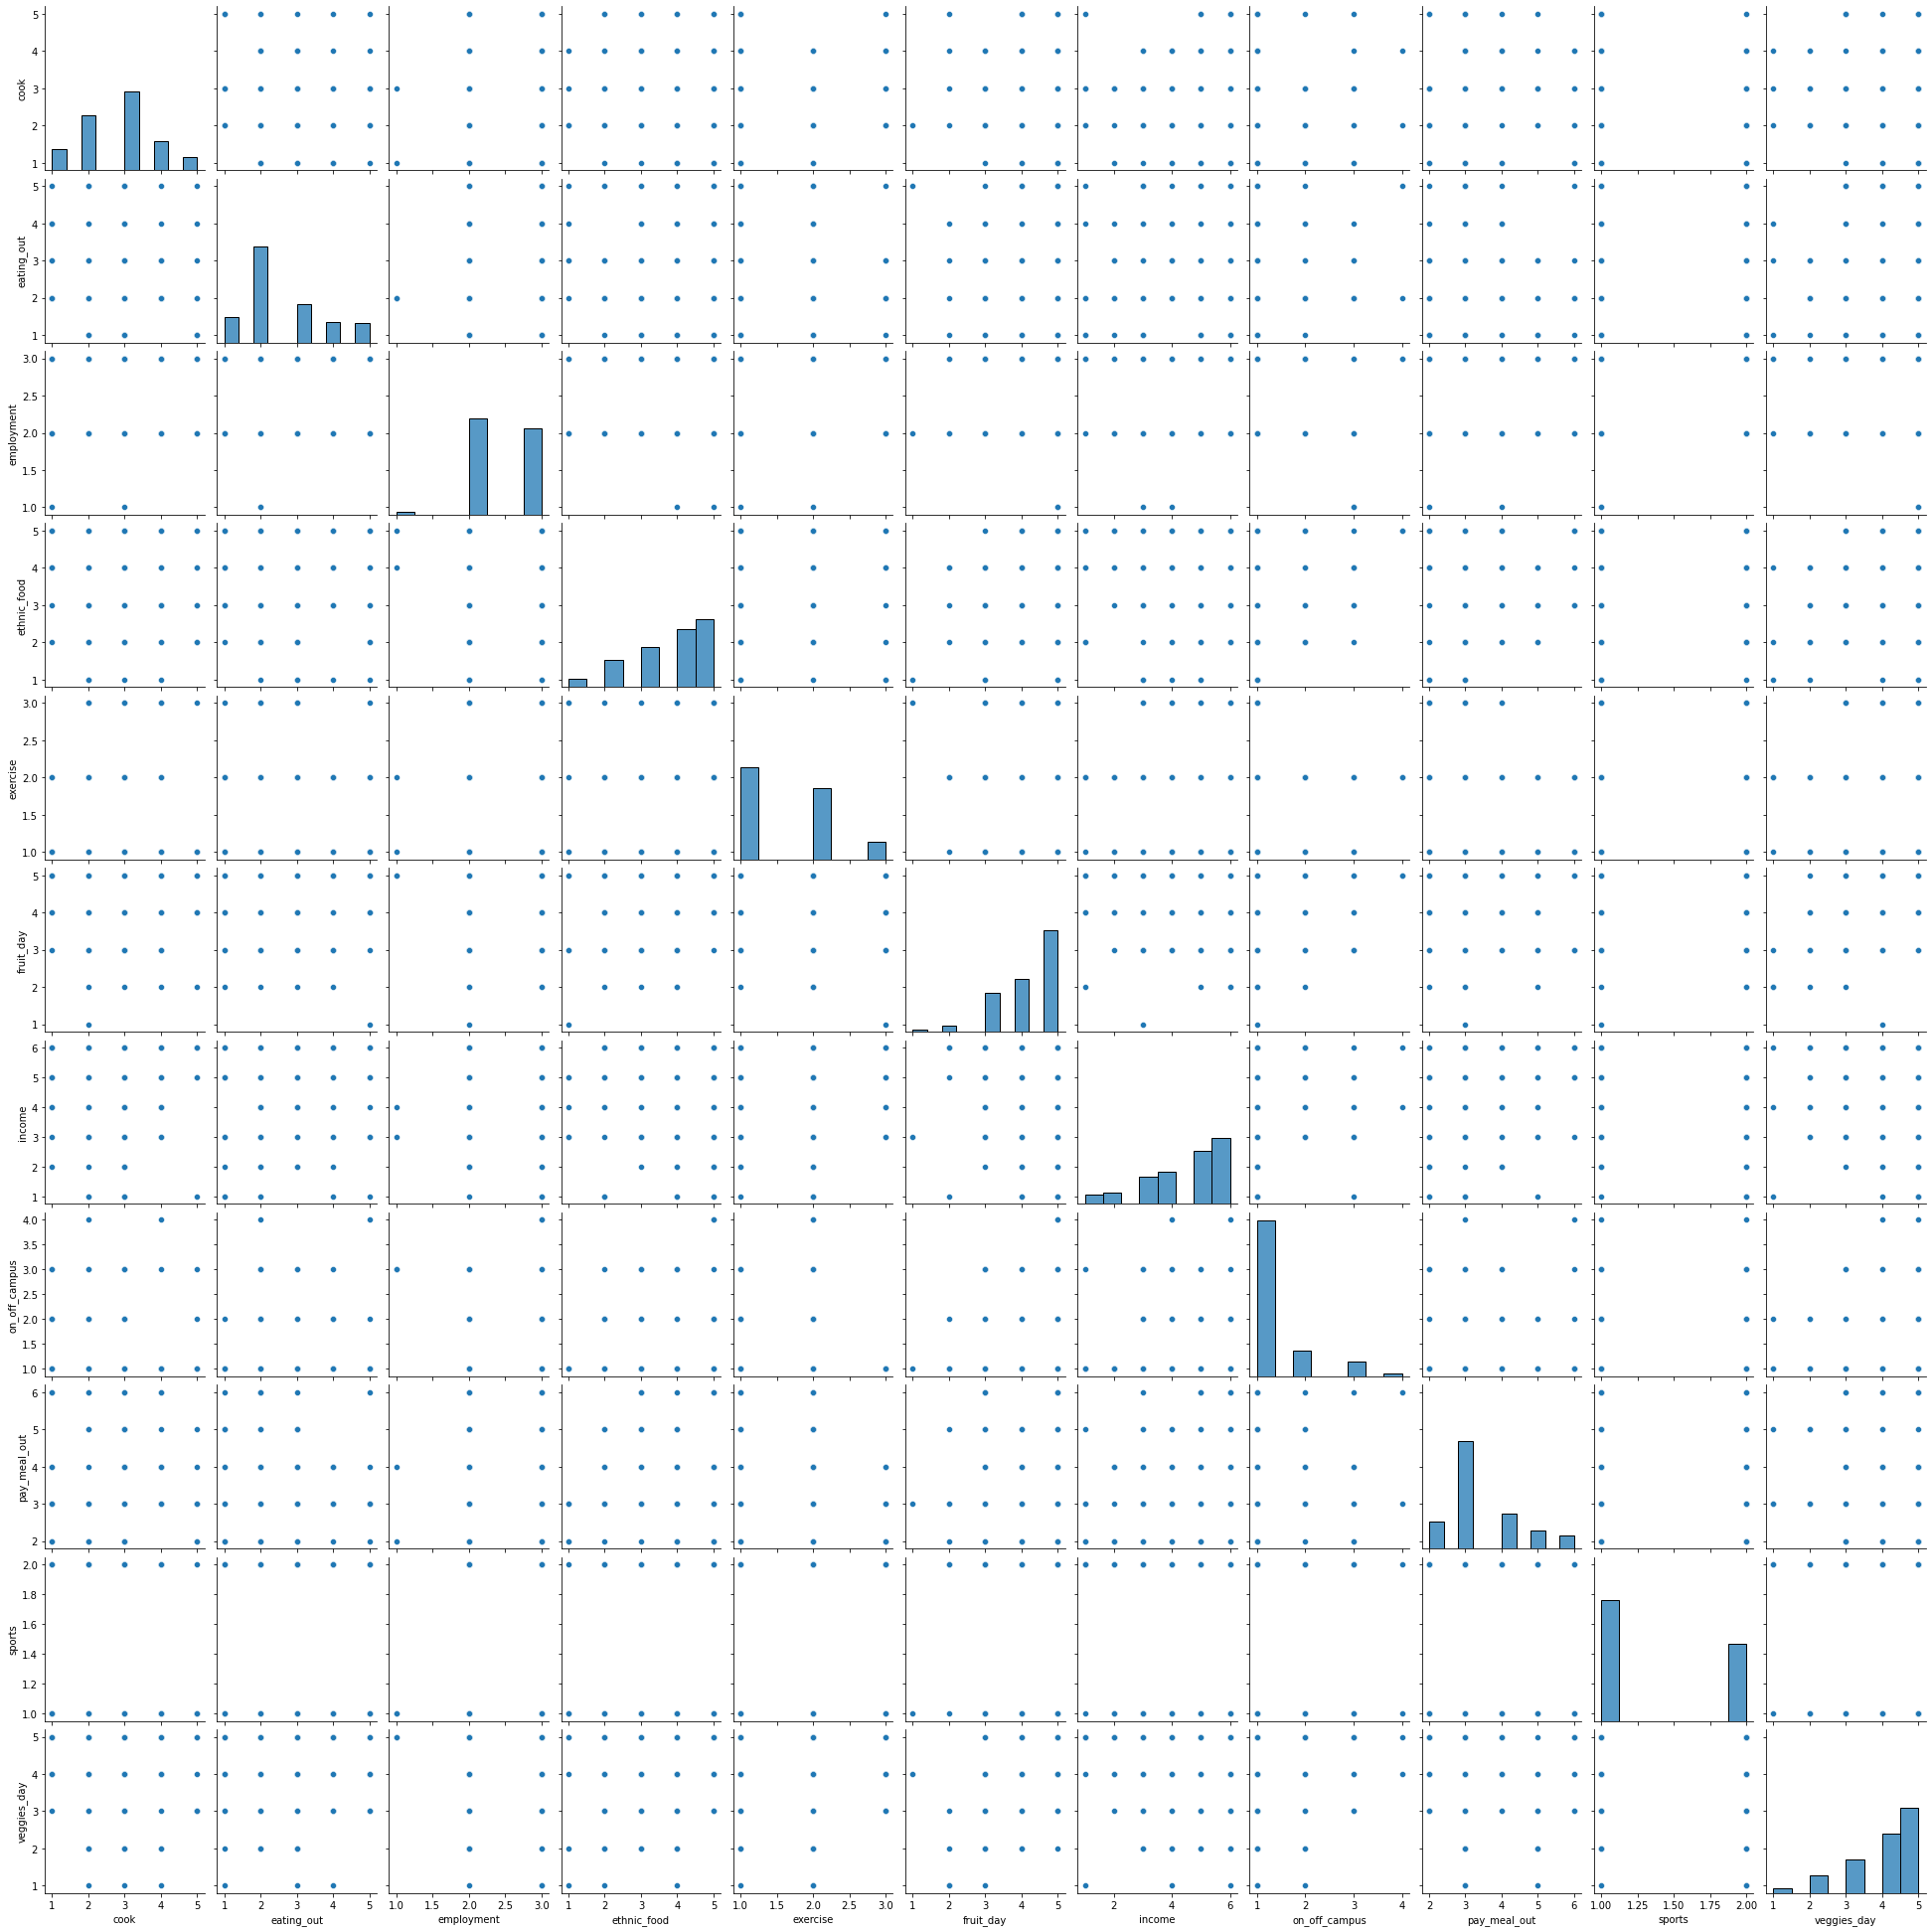

In [ ]:
import seaborn as sns
sns.pairplot(d)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Boxplot of Food Choices')

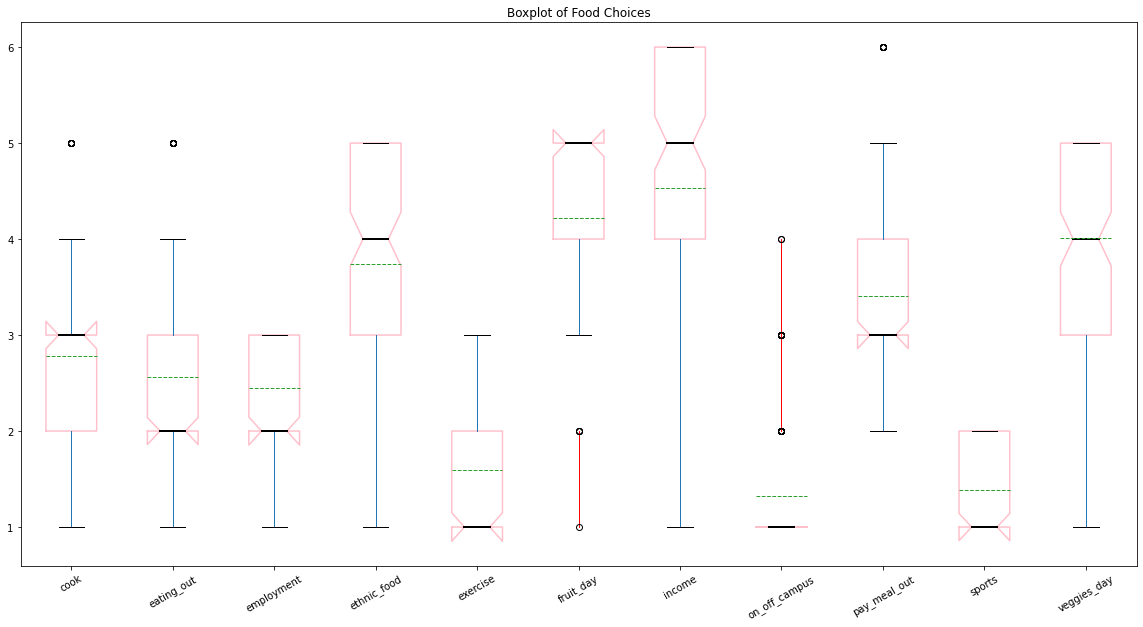

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline 

#boxplot by pandas
boxprops = dict(linestyle='-', linewidth=1.5, color='pink')
medianprops = dict(linestyle='-', linewidth=2, color='black')
flierprops= dict(linestyle='-', linewidth=1.0, color='red')
ax=d.boxplot(figsize= (20,10),showmeans = True, boxprops=boxprops, medianprops=medianprops,flierprops=flierprops, notch= True, meanline= True, grid = False ,return_type = None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title("Boxplot of Food Choices")

In [ ]:
d.shape

(125, 11)

In [ ]:
s=d.dropna()

In [ ]:
#Run KMeans Clustering on the data


In [ ]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy
## for deep learning
!pip install minisom
import minisom 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


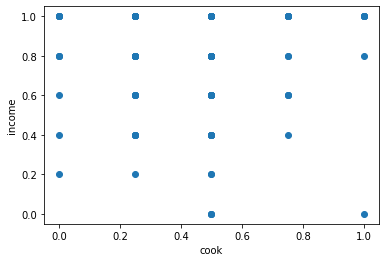

In [ ]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import minisom 

scaler = MinMaxScaler()

scaler.fit(s[['income']])
s['income'] = scaler.transform(s[['income']])

scaler.fit(s[['cook']])
s['cook'] = scaler.transform(s[['cook']])

plt.scatter(s['cook'], s['income'])
plt.xlabel('cook')
plt.ylabel('income')
k_rng = range(1,10)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(s[['cook','income']])
    sse.append(km.inertia_)




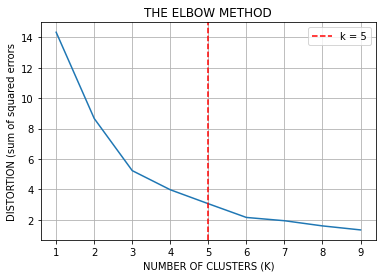

In [ ]:
k = [i*100 for i in np.diff(sse,2)].index(min([i*100 for i 
     in np.diff(sse,2)]))

plt.xlabel('NUMBER OF CLUSTERS (K)')
plt.ylabel('DISTORTION (sum of squared errors')
plt.plot(k_rng,sse)
plt.axvline(k, ls='--', color="red", label="k = "+str(k))
plt.title('THE ELBOW METHOD')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(s[['cook','income']])
y_predicted

array([2, 1, 2, 2, 2, 1, 4, 0, 1, 4, 0, 3, 2, 0, 3, 1, 0, 0, 3, 0, 3, 3,
       0, 0, 3, 2, 0, 0, 4, 1, 3, 4, 0, 2, 0, 3, 0, 4, 2, 1, 3, 1, 0, 2,
       1, 0, 2, 2, 2, 4, 0, 0, 4, 2, 3, 0, 2, 1, 2, 0, 2, 4, 0, 4, 4, 2,
       3, 1, 1, 2, 0, 2, 3, 1, 3, 2, 4, 3, 0, 2, 0, 3, 1, 0, 4, 4, 3, 2,
       1, 2, 2, 2, 1, 3, 1, 1, 4, 1, 1, 1], dtype=int32)

In [ ]:
s['cluster']=y_predicted
s.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,cluster
0,0.25,3,3.0,1,1.0,5,0.8,1.0,2,1.0,5,2
1,0.50,2,2.0,4,1.0,4,0.6,1.0,4,1.0,4,1
2,0.00,2,3.0,5,2.0,5,1.0,2.0,3,2.0,5,2
3,0.25,2,3.0,5,3.0,4,1.0,1.0,2,2.0,3,2
4,0.00,2,2.0,4,1.0,4,1.0,1.0,4,1.0,4,2


In [ ]:
km.cluster_centers_

array([[0.5       , 0.88333333],
       [0.5375    , 0.37      ],
       [0.17      , 0.92      ],
       [0.83823529, 0.89411765],
       [0.19642857, 0.45714286]])

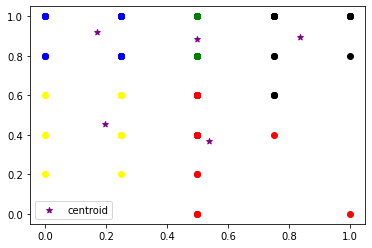

In [ ]:
s1 = s[s.cluster==0]
s2 = s[s.cluster==1]
s3 = s[s.cluster==2]
s4 = s[s.cluster==3]
s5 = s[s.cluster==4]
plt.scatter(s1['cook'],s1['income'],color='green')
plt.scatter(s2['cook'],s2['income'],color='red')
plt.scatter(s3['cook'],s3['income'],color='blue')
plt.scatter(s4['cook'],s4['income'],color='black')
plt.scatter(s5['cook'],s5['income'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "A5D1L45OKZX231DCOHUWI3OM5KRRPBHUVHEVEFVOIUNEBROR" # your Foursquare ID
CLIENT_SECRET = "Y10X5MSSBXEYSFCSPXPM1AV1BLOSW2M1KB4F1WHF5EWOIIX5" # your Foursquare Secret
VERSION = '20210914' #YYYYMMDD
LIMIT = 10000

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    13.133521, 77.567135,
    30000,
    LIMIT)






In [ ]:
results = requests.get(url).json()

In [ ]:
results

{'meta': {'code': 200, 'requestId': '61432a6e0e1fe37f37a17038'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-54cf2060498e7db4b0f114ab-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d115951735',
         'name': 'Bike Shop',
         'pluralName': 'Bike Shops',
         'primary': True,
         'shortName': 'Bike Shop'}],
       'id': '54cf2060498e7db4b0f114ab',
       'location': {'cc': 'IN',
        'city': 'Bangalore',
        'country': 'India',
        'distance': 8085,
        'formattedAddress': ['Bangalore', 'Karnātaka', 'India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 13.168697398893203,
          'lng': 77.63238890489083}],
        'lat': 13.1686973988932

In [ ]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-582f4eadfb549a1ff5a23b0a-1,0,"[{'summary': 'This spot is popular', 'type': '...",582f4eadfb549a1ff5a23b0a,The Druid Garden,13.063946,77.591492,"[{'label': 'display', 'lat': 13.06394560121628...",8182,IN,Bangalore,Karnātaka,India,[40/1 Century Corbel Commercial (Sahakarnagar)...,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],40/1 Century Corbel Commercial,Sahakarnagar,NaN,NaN,NaN
2,e-0-4f1869c7e4b0ebf9e4ae9134-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN
3,e-0-4d52ba92d7eaa1437dee810f-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d52ba92d7eaa1437dee810f,Kanti Sweets,13.039038,77.564354,"[{'label': 'display', 'lat': 13.03903794158175...",10522,IN,Bangalore,Karnātaka,India,"[Chandrappa Complex (New BEL Road), Bangalore ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Chandrappa Complex,New BEL Road,560054,NaN,NaN
4,e-0-531ed995498ef21f6f904159-4,0,"[{'summary': 'This spot is popular', 'type': '...",531ed995498ef21f6f904159,"PVR Gold Class, Orion",13.010923,77.555010,"[{'label': 'display', 'lat': 13.01092312496633...",13710,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4b8676e7f964a520318b31e3-95,0,"[{'summary': 'This spot is popular', 'type': '...",4b8676e7f964a520318b31e3,Vidyarthi Bhavan,12.945082,77.571415,"[{'label': 'display', 'lat': 12.94508159006891...",20981,IN,Bangalore,Karnātaka,India,"[#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],#32,Gandhi Bazaar Rd,560004,NaN,NaN
96,e-0-5487c423498e2d2c489f2c88-96,0,"[{'summary': 'This spot is popular', 'type': '...",5487c423498e2d2c489f2c88,Priyadarshini Grand,12.990235,77.538020,"[{'label': 'display', 'lat': 12.99023488019278...",16259,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],NaN,NaN,NaN,NaN,NaN
97,e-0-57fe668e498ea64ba5a539e4-97,0,"[{'summary': 'This spot is popular', 'type': '...",57fe668e498ea64ba5a539e4,Koramangala Social,12.935518,77.614097,"[{'label': 'display', 'lat': 12.93551830266139...",22622,IN,Bangalore,Karnātaka,India,"[Kormangala (118 Industrial area), Bangalore 5...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],Kormangala,118 Industrial area,560030,NaN,NaN
98,e-0-4faba6fde4b0db927cea484c-98,0,"[{'summary': 'This spot is popular', 'type': '...",4faba6fde4b0db927cea484c,Debenhams,13.011302,77.555054,"[{'label': 'display', 'lat': 13.01130224926408...",13668,IN,Bangalore,Karnātaka,India,"[Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...","[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",0,[],Orion Mall,Dr. Rajkumar Road,NaN,NaN,NaN


In [ ]:
#Adding two more Columns Restaurant, Grocery and Others
#Restaurant: Number of Restaurant in the radius of 20 km
#others:Number of Gyms, Parks,etc in the radius of 20 km

In [ ]:
resta = []
oth = []
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    res
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']
    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id,restaurant,others
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN,3,2
1,e-0-582f4eadfb549a1ff5a23b0a-1,0,"[{'summary': 'This spot is popular', 'type': '...",582f4eadfb549a1ff5a23b0a,The Druid Garden,13.063946,77.591492,"[{'label': 'display', 'lat': 13.06394560121628...",8182,IN,Bangalore,Karnātaka,India,[40/1 Century Corbel Commercial (Sahakarnagar)...,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],40/1 Century Corbel Commercial,Sahakarnagar,NaN,NaN,NaN,19,10
2,e-0-4f1869c7e4b0ebf9e4ae9134-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN,29,29
3,e-0-4d52ba92d7eaa1437dee810f-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d52ba92d7eaa1437dee810f,Kanti Sweets,13.039038,77.564354,"[{'label': 'display', 'lat': 13.03903794158175...",10522,IN,Bangalore,Karnātaka,India,"[Chandrappa Complex (New BEL Road), Bangalore ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Chandrappa Complex,New BEL Road,560054,NaN,NaN,13,10
4,e-0-531ed995498ef21f6f904159-4,0,"[{'summary': 'This spot is popular', 'type': '...",531ed995498ef21f6f904159,"PVR Gold Class, Orion",13.010923,77.555010,"[{'label': 'display', 'lat': 13.01092312496633...",13710,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],NaN,NaN,NaN,NaN,NaN,31,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4b8676e7f964a520318b31e3-95,0,"[{'summary': 'This spot is popular', 'type': '...",4b8676e7f964a520318b31e3,Vidyarthi Bhavan,12.945082,77.571415,"[{'label': 'display', 'lat': 12.94508159006891...",20981,IN,Bangalore,Karnātaka,India,"[#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],#32,Gandhi Bazaar Rd,560004,NaN,NaN,47,7
96,e-0-5487c423498e2d2c489f2c88-96,0,"[{'summary': 'This spot is popular', 'type': '...",5487c423498e2d2c489f2c88,Priyadarshini Grand,12.990235,77.538020,"[{'label': 'display', 'lat': 12.99023488019278...",16259,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],NaN,NaN,NaN,NaN,NaN,20,4
97,e-0-57fe668e498ea64ba5a539e4-97,0,"[{'summary': 'This spot is popular', 'type': '...",57fe668e498ea64ba5a539e4,Koramangala Social,12.935518,77.614097,"[{'label': 'display', 'lat': 12.93551830266139...",22622,IN,Bangalore,Karnātaka,India,"[Kormangala (118 Industrial area), Bangalore 5...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],Kormangala,118 Industrial area,560030,NaN,NaN,76,24
98,e-0-4faba6fde4b0db927cea484c-98,0,"[{'summary': 'This spot is popular', 'type': '...",4faba6fde4b0db927cea484c,Debenhams,13.011302,77.555054,"[{'label': 'display', 'lat': 13.01130224926408...",13668,IN,Bangalore,Karnātaka,India,"[Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...","[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",0,[],Orion Mall,Dr. Rajkumar Road,NaN,NaN,NaN,29,29


In [ ]:
#changing the column name

In [ ]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

In [ ]:
#Install the minisom library using pip
#MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM). SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display. Minisom is designed to allow researchers to easily build on top of it and to give students the ability to quickly grasp its details.

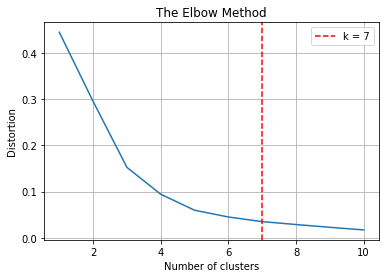

In [ ]:
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
city = "Bangalore"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
[lat, long]: [12.9791198, 77.5912997]


In [ ]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id,restaurant,others
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN,3,2
1,e-0-582f4eadfb549a1ff5a23b0a-1,0,"[{'summary': 'This spot is popular', 'type': '...",582f4eadfb549a1ff5a23b0a,The Druid Garden,13.063946,77.591492,"[{'label': 'display', 'lat': 13.06394560121628...",8182,IN,Bangalore,Karnātaka,India,[40/1 Century Corbel Commercial (Sahakarnagar)...,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],40/1 Century Corbel Commercial,Sahakarnagar,NaN,NaN,NaN,19,10
2,e-0-4f1869c7e4b0ebf9e4ae9134-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN,29,29
3,e-0-4d52ba92d7eaa1437dee810f-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d52ba92d7eaa1437dee810f,Kanti Sweets,13.039038,77.564354,"[{'label': 'display', 'lat': 13.03903794158175...",10522,IN,Bangalore,Karnātaka,India,"[Chandrappa Complex (New BEL Road), Bangalore ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Chandrappa Complex,New BEL Road,560054,NaN,NaN,13,10
4,e-0-531ed995498ef21f6f904159-4,0,"[{'summary': 'This spot is popular', 'type': '...",531ed995498ef21f6f904159,"PVR Gold Class, Orion",13.010923,77.555010,"[{'label': 'display', 'lat': 13.01092312496633...",13710,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],NaN,NaN,NaN,NaN,NaN,31,29


In [ ]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.address', 'venue.location.crossStreet',
       'venue.location.postalCode', 'venue.location.neighborhood',
       'venue.venuePage.id', 'restaurant', 'others'],
      dtype='object')

In [ ]:
#Data Cleaning Process for Extracting Necessary Columns in the Dataset

In [ ]:
index=['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others']
    
nv = nearby_venues[index]

In [ ]:
nv

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,13.168697,77.632389,"[Bangalore, Karnātaka, India]",3,2
1,13.063946,77.591492,[40/1 Century Corbel Commercial (Sahakarnagar)...,19,10
2,13.011313,77.555039,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...",29,29
3,13.039038,77.564354,"[Chandrappa Complex (New BEL Road), Bangalore ...",13,10
4,13.010923,77.555010,[India],31,29
...,...,...,...,...,...
95,12.945082,77.571415,"[#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...",47,7
96,12.990235,77.538020,[India],20,4
97,12.935518,77.614097,"[Kormangala (118 Industrial area), Bangalore 5...",76,24
98,13.011302,77.555054,"[Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...",29,29


In [ ]:
nv=nv.dropna()
nv = nv.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
nv

,lat,long,venue.location.formattedAddress,restaurant,others
0,13.168697,77.632389,"[Bangalore, Karnātaka, India]",3,2
1,13.063946,77.591492,[40/1 Century Corbel Commercial (Sahakarnagar)...,19,10
2,13.011313,77.555039,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...",29,29
3,13.039038,77.564354,"[Chandrappa Complex (New BEL Road), Bangalore ...",13,10
4,13.010923,77.555010,[India],31,29
...,...,...,...,...,...
95,12.945082,77.571415,"[#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...",47,7
96,12.990235,77.538020,[India],20,4
97,12.935518,77.614097,"[Kormangala (118 Industrial area), Bangalore 5...",76,24
98,13.011302,77.555054,"[Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...",29,29


In [ ]:
#Convert Every Row of Column 'venue.location.formattedAddress' from List to String

nv['venue.location.formattedAddress']

0                         [Bangalore, Karnātaka, India]
1     [40/1 Century Corbel Commercial (Sahakarnagar)...
2     [#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...
3     [Chandrappa Complex (New BEL Road), Bangalore ...
4                                               [India]
                            ...                        
95    [#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...
96                                              [India]
97    [Kormangala (118 Industrial area), Bangalore 5...
98    [Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...
99    [#74/4 (3rd Crs, Residency Rd), Bangalore 5600...
Name: venue.location.formattedAddress, Length: 100, dtype: object

In [ ]:
spec_chars = ["[","]"]
for char in spec_chars:
  nv['venue.location.formattedAddress'] = nv['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')

In [ ]:
from tabulate import tabulate
print(tabulate(nv, headers=['S No.','lat','long','venue.location.formattedAddress','restaurant','others'], tablefmt='fancy_grid'))


╒═════════╤═════════╤═════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╤══════════╕
│   S No. │     lat │    long │ venue.location.formattedAddress                                                                                                                            │   restaurant │   others │
╞═════════╪═════════╪═════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╪══════════╡
│       0 │ 13.1687 │ 77.6324 │ 'Bangalore', 'Karnātaka', 'India'                                                                                                                          │            3 │        2 │
├─────────┼─────────┼─────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [ ]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = nv.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(nv[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_

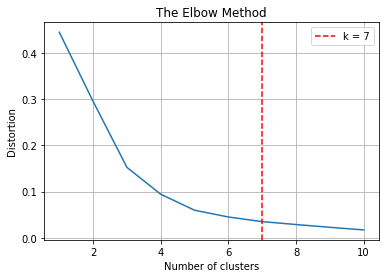

In [ ]:
X = nv[["lat","long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = nv[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
nv[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
nv


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",3,2,3,0
1,13.063946,77.591492,'40/1 Century Corbel Commercial (Sahakarnagar...,19,10,2,0
2,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",29,29,2,0
3,13.039038,77.564354,"'Chandrappa Complex (New BEL Road)', 'Bangalo...",13,10,2,0
4,13.010923,77.555010,'India',31,29,2,0
...,...,...,...,...,...,...,...
95,12.945082,77.571415,"'#32 (Gandhi Bazaar Rd)', 'Bangalore 560004',...",47,7,6,0
96,12.990235,77.538020,'India',20,4,2,0
97,12.935518,77.614097,"'Kormangala (118 Industrial area)', 'Bangalor...",76,24,6,0
98,13.011302,77.555054,"'Orion Mall (Dr. Rajkumar Road)', 'Bangalore'...",29,29,2,0


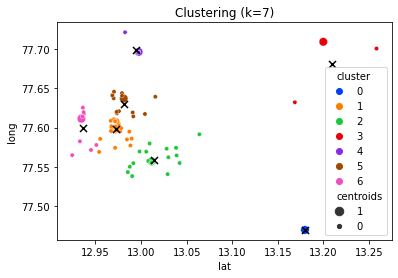

In [ ]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=nv, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [ ]:
model = cluster.AffinityPropagation()

Text(0.5, 1.0, 'Clustering (k=7)')

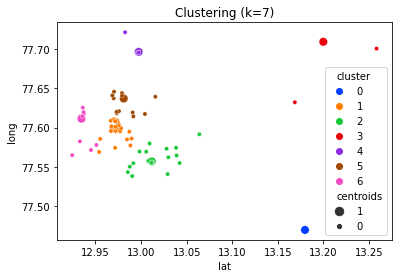

In [ ]:
k = nv["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=nv, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [ ]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = nv.copy()
## create color column
lst_elements = sorted(list(nv[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(nv[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_

# ***thank you!***





---




